In [2]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST("", train=True, download=True,
                       transform= transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True,
                       transform= transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=(10), shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=(10), shuffle=True)

fc1

fc: fully connected

1: level 1

Linear parameters requires, input and output

input = usually a matrix
output = usually an array -> Linear

In [3]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)  # second layer
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)  # output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


F.relu() => Rectifier activate function

the final layer doesn't need the activate function

In [4]:
X = torch.rand((28,28))
X = X.view(-1, 28*28)

we generated a tensor as a matrix.

So we need to flat it before pass it to the network


In [5]:
output = net(X)

output

tensor([[-2.2693, -2.4393, -2.1875, -2.3677, -2.1864, -2.4391, -2.3096, -2.3795,
         -2.2290, -2.2596]], grad_fn=<LogSoftmaxBackward>)

In [6]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(),lr = 0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)




tensor(0.0123, grad_fn=<NllLossBackward>)
tensor(0.3166, grad_fn=<NllLossBackward>)
tensor(0.0077, grad_fn=<NllLossBackward>)


In [23]:
correct = 0
total =  0
with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
            total += 1

print("Accuracy: ", round(correct/total, 3))


Accuracy:  0.978


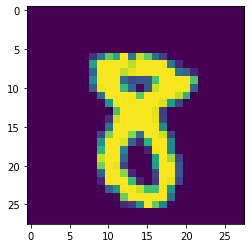

In [57]:
import matplotlib.pyplot as plt
plt.imshow(X[2].view(28,28))
plt.show()

In [59]:
with torch.no_grad():
    output = torch.argmax(net(X[2].view(-1,784)))
print(output)


tensor(8)
